<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1> Clasificación y optimización (fine tuning) con RANDOM FOREST para aprobación de un crédito en una institución financiera. Transformación de variables categóricas</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remigiohurtado@gmail.com

En esta práctica aprenderás a desarrollar y optimizar un clasificador mediante Random Forest para predecir si un cliente en un banco es un cliente adecuado (bueno-bajo riesgo) o un cliente no adecuado (malo-alto riesgo) para concederle un crédito. Para ello, utilizaremos un Pipeline que es una herramienta que permite combinar transformadores, clasificadores, regresores u otros estimadores para construir un estimador compuesto. En el Pipeline integraremos pasos de transformación de variables y el clasificador. Además, aprenderás a evaluar y optimizar/ajustar (Tuning) los parámetros del método mediante las funciones de cross_val_score, metrics y GridSearchCV. Finalmente, aprenderás a presentar los resultados en un Heatmap de tal manera que puedas indentificar visualmente los mejores valores de los parámetros (hiperparámetros). 

En este ejemplo seguirás un proceso de análisis de datos en fases: 
- **Fase 1:** preparación de datos 
- **Fase 2:** entrenamiento base de una red neuronal
- **Fase 3:** optimización del modelo de red neuronal (Fine Tuning)
- **Fase 4:** predicción de nuevos samples (nuevos clientes) 

Requisitos: es importante tener conocimientos de Python y de Fundamentos de Machine Learning. Te sugerimos previamente revisar las prácticas de preparación del conjunto de datos que utilizaremos: <a href="https://genscinet.com/analisis-exploratorio/" target="blank">análisis exploratorio </a> y <a href="https://genscinet.com/transformacion-clasificacionknn/" target="blank">transformación de variables categóricas y clasificación con KNN</a>.

Esta práctica está estructurada de la siguiente manera:

- [Fundamentos de Machine Learning (Aprendizaje Automático) y Random Forest](#fundamentos)

- [Fase 1: Preparación de datos](#preparacion-datos)

- [Fase 2: Entrenamiento base de un Random Forest](#entrenamiento-base)

- [Fase 3: Optimización del modelo Random Forest (Fine Tuning)](#optimizacion)

- [Fase 4: Predicción de nuevos samples (nuevos clientes)](#PrediccionNuevoElemento)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Machine Learning (Aprendizaje Automático) y Random Forest</h2> </div>

"El aprendizaje automático es una rama en evolución de los algoritmos computacionales que están diseñados para emular la inteligencia humana aprendiendo del entorno circundante. Se les considera el caballo de batalla en la nueva era del Big Data. Las técnicas basadas en el aprendizaje automático se han aplicado con éxito en diversos campos que van desde el reconocimiento de patrones, la visión por computadora, la ingeniería de naves espaciales, las finanzas, el entretenimiento y la biología computacional hasta aplicaciones biomédicas y médicas" [1], [2].

El aprendizaje automático (machine learning) es un subconjunto de la inteligencia artificial y el aprendizaje profundo (deep learning) es un subconjunto del aprendizaje automático. Los modelos de Machine Learning no requieren necesariamente grandes sumas de datos, por lo que pueden resolver problemas menos complicados en un corto período de tiempo [3].

**Tipos de Aprendizaje Automático**

El Aprendizaje Automático puede dividirse en tres categorías principales [4]: 
- **Supervisado (Supervised Learning):** requieren etiquetas (variable de salida o conocida como variable dependiente)
- **No supervisado (Unsupervised Learning):** no requieren etiquetas
- **Por refuerzo (Reinforced Learning)**

**1. Aprendizaje Supervisado:** son los algoritmos de aprendizaje automático más utilizados para el análisis predictivo. Estos algoritmos dependen de conjuntos de datos que fueron procesados por los expertos humanos (por lo tanto, se usa la palabra “supervisión”). Los algoritmos luego aprenden cómo realizar las mismas tareas de procesamiento de forma independiente en los nuevos conjuntos de datos. En particular, los métodos supervisados se utilizan para resolver problemas de regresión y clasificación.

**2. Aprendizaje No Supervisado:** los algoritmos de aprendizaje automático no supervisados no requieren expertos humanos de los que aprender, sino que descubren patrones en los datos de forma autónoma. Algunos ejemplos de problemas resueltos con métodos no supervisados son el agrupamiento (clustering) y la asociación.

**3. Aprendizaje por Refuerzo:** los algoritmos de aprendizaje automático por refuerzo funcionan bajo el siguiente enfoque: por cada paso incorrecto el sistema es castigado (penalizado) y por cada paso correcto el sistema es recompensado.

**Problemas de clasificación:** la variable de salida es discreta. Los grupos o clases son predefinidos. Ejemplos: reconocimiento de imágenes (reconocimiento de números manuscritos, reconocimiento de objetos, reconocimiento de rostros), diagnósticos de las patologías de exámenes médicos (tumor benigno o maligno, cáncer o no cáncer, Parkinson o no Parkinson, diabetes o no diabetes), clasificación de personas según su historial crediticio (confiable o no confiable), reconocimiento de gustos o intereses, por ejemplo, si un producto le gustará (producto recomendado) o no (producto no recomendado) a una persona, afinidades políticas (si una persona votará o no por un candidato),etc. 

**Problemas de regresión:** son el cálculo de las relaciones matemáticas entre una variable continua y una o más variables. La ejecución de la regresión significa encontrar la función que interpola mejor los valores. Una función de regresión permite estimar el valor de una variable dado el valor de otra para los valores que no se han obtenido antes. Ejemplos: posición de un automóvil y su velocidad, estimación del costo de una casa o de un auto, consumo de gasolina en una ciudad, nivel de contaminación, el porcentaje de aceptación de un político en una ciudad o sector, etc.

**Métodos de agrupamiento:** estos se pueden ver como la detección automática (descubrimiento) de grupos de observaciones que tienen características similares, que pueden indicar posiblemente el hecho de que un miembro del grupo pertenece a una clase bien definida. Por ejemplo, los algoritmos de agrupamiento se pueden utilizar en marketing digital para identificar grupos de usuarios basados en su historial de compras en línea, y luego enviar avisos dirigidos a cada miembro. También se puede identificar grupos de productos para conformar y promocionar paquetes y servicios.   

**Métodos de asociación:** estos son un problema muy relevante para los comerciantes en línea, y consisten en detectar grupos de elementos que se observan con frecuencia en conjunto. Ejemplo: sugerir compras adicionales a un usuario según el contenido de su carrito de compras. Otro ejemplo sería identificar relaciones entre productos para formar secuencias de productos que maximicen el beneficio para las tiendas y para los clientes.

**Aplicaciones del Aprendizaje Automático**

- Marketing: Acertar en la toma de decisiones. La demanda de una tienda en concreto, permitiendo optimizar el inventario y el personal
- Marketing Personalizado / Sistemas de Recomendación: descubrir mercados, analizar comportamientos, predecir ventas
- Detección de Fraude: transacciones ilícitas, lavado de activos
- Reconocimiento de Imágenes: digitalización de textos, reconocimiento de manuscritos (handwriting)
- Reconocimiento de Rostros: seguridad con cámaras para mitigar la delincuencia
- Bolsa de Valores: predecir tendencias
- Comercio Financiero: análisis financiero. Predecir stock para tomar decisiones de compra, venta
- Atención al Cliente: con Procesamiento de Lenguaje Natural (NLP) y Chatbots contextuales
- Predicción de Enfermedades
- Cybersecurity: detección de Malware, Spam, etc.
- Evaluación de Riesgos: clasificación de usuarios - nivel de riesgo (en seguros, préstamos) 
- Tendencias en Política
- Infraestructura y Networking: en Redes Basadas en Intención (IBN) el reconocimiento de intenciones y aseguramiento de servicios
- Ecommerce (la inteligencia artificial impacta al comercio online y el offline): recomendaciones de compra y optimización de logística (planificación de rutas de reparto).

**Clasificación de algoritmos de Aprendizaje Automático**

Jason Brownlee en 2019 publicó una clasificación muy clara de los algoritmos de aprendizaje automático. A continuación, se presenta dicha clasificación de los principales algoritmos por categorías [5]. 

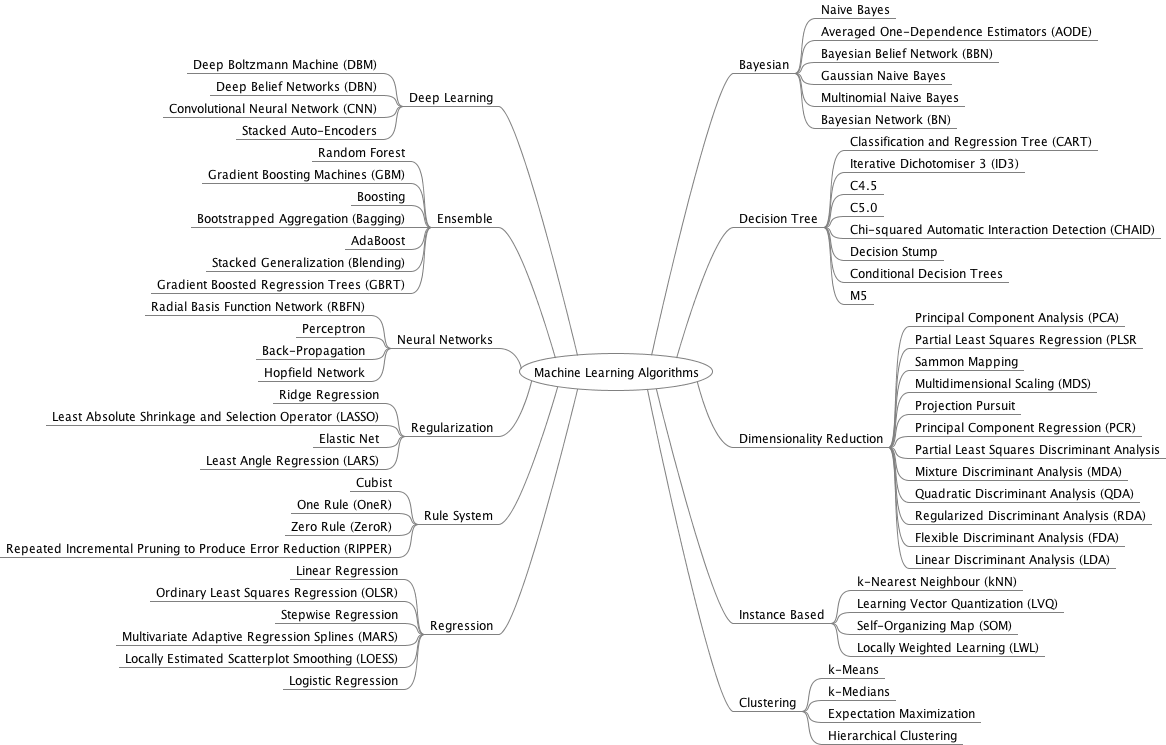

**Decision Tree**

Los Decision Tree o Árboles de Decisión representan un problema de clasificación como un conjunto de decisiones basadas en los valores de las funciones [4]. Cada nodo del árbol representa un umbral sobre el valor de una función y divide los ejemplos de entrenamiento en dos grupos más pequeños. El proceso de decisión se repite (recursivamente) sobre todas las características, con lo que el árbol crece hasta que se divida los ejemplos (samples) de una manera óptima. La clasificación de un nuevo ejemplo luego puede obtenerse siguiendo las ramas del árbol según los valores de sus funciones. Una vista simplificada de un árbol de decisión binario y de los tipos de nodos se muestra en la figura.

# 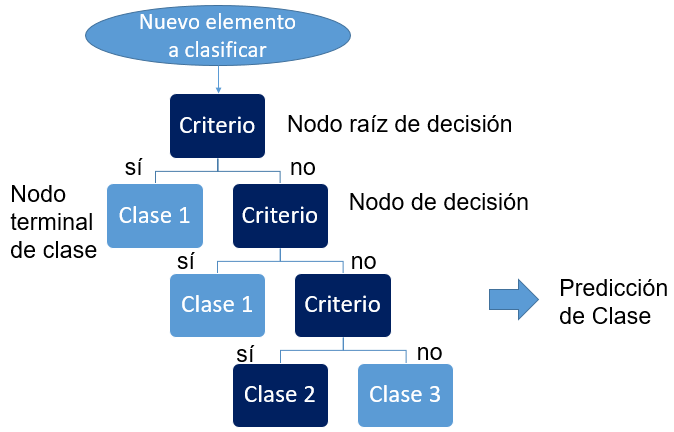

**Random Forest (Bosque Aleatorio)**

En la clasificación de algoritmos de aprendizaje automático se puede identificar dentro de la categoría de algoritmos "Ensemble", el algoritmo Random Forest. Un Random Forest es un metaestimador que se ajusta a una serie de clasificadores de árboles de decisión "Decision Tree" en varias submuestras del conjunto de datos y utiliza una función de agregación (ejemplo: promedios) para mejorar la precisión predictiva y controlar el sobreajuste [4]. En Python se puede desarrollar un RandomForest con RandomForestClassifier desde sklearn.ensemble. Precisamente, en esta práctica aprenderás a crear y optimizar un clasificador mediante Random Forest para predecir si un cliente en un banco es un cliente adecuado (confiable de acuerdo a su información como el historial crediticio y otras características) o un cliente no adecuado (no confiable), de tal manera que este método puede servir como soporte para la toma de decisiones en una institución financiera (Banco o Cooperativa) a la hora de decidir si conceder o no conceder un crédito a un cliente.

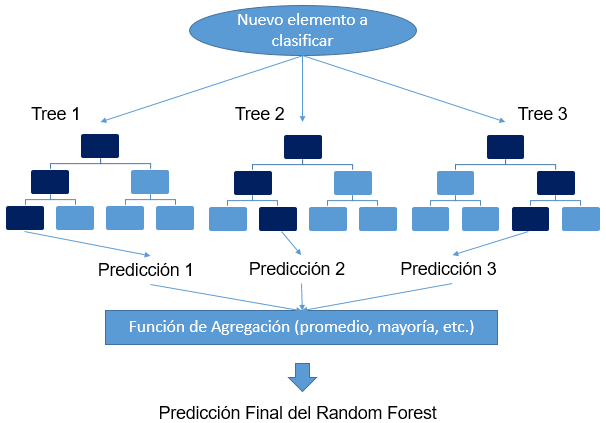

<div id="preparacion-datos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 1: Preparación de datos</h2> </div>

<div id="Importacion" style="color:#106ba3"><h3>Importación de librerías</h3> </div>

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config   
from sklearn.ensemble import RandomForestClassifier

print("Módulos y clases importados")

Módulos y clases importados


<div id="Carga-descripcion" style="color:#106ba3"><h3>Carga y descripción del dataset</h3> </div>

Nombre del dataset: Statlog (German Credit Data).
Enlace: http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) [6].

Descripción general: este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como riesgos crediticios buenos o malos.

Número de Variables (o atributos): 21

Número de instancias (clientes en el banco): 1000

Salida: TIPOCLIENTE (BUEN CLIENTE O BAJO RIESGO:1, MAL CLIENTE O ALTO RIESGO:2)

In [3]:
nombresVariables=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
                  'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
                  'ACTIVOS','EDAD','OTROSPLANESPAGO','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO',
                  'CANTIDADPERSONASAMANTENER','TELEFONO','TRABAJADOREXTRANJERO','TIPOCLIENTE']
#Cargar un dataframe desde una URL
dataframe = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep = ' ', 
                         names=nombresVariables)
#Cargar un dataframe de un archivo local
#dataset = "Datasets/german.data"
#dataframe = pd.read_csv(dataset, sep = ' ', names=nombresVariables)

print('cantidad de observaciones (clientes): ',dataframe.shape[0])
print('cantidad de variables: ',dataframe.shape[1])
print(dataframe.shape)
dataframe.head()

cantidad de observaciones (clientes):  1000
cantidad de variables:  21
(1000, 21)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<div id="formato-salida" style="color:#106ba3"><h3>Formato a la variable de salida</h3> </div>

In [4]:
#Se modifica la variable de salida (de estudio): TIPOCLIENTE. Es mejor tener la salida en formato binario cuando hay dos clases
dataframe['TIPOCLIENTE'] = dataframe['TIPOCLIENTE'].replace(2, 0)
dataframe.head()

,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


<div id="eliminacion-variables" style="color:#106ba3"><h3>Eliminación de variables y separación de variable de salida</h3> </div>

In [5]:
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X" 
Y=dataframe['TIPOCLIENTE']
dataframe=dataframe.drop(['OTROSPLANESPAGO'], axis=1)
dataframe=dataframe.drop(['TELEFONO'], axis=1)
dataframe=dataframe.drop(['TIPOCLIENTE'], axis=1)
print(dataframe.shape)
dataframe.head()

(1000, 18)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,2,A201


<AxesSubplot: xlabel='TIPOCLIENTE', ylabel='count'>

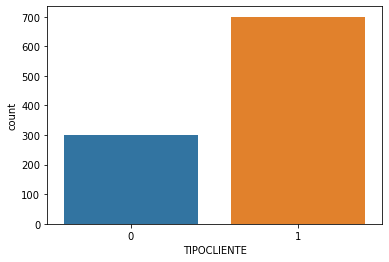

In [6]:
#Se genera una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
sns.countplot(x=Y)

<div id="analisis-variables" style="color:#106ba3"><h3>Análisis de variables categóricas</h3> </div>

Si tienes el pipeline de preprocesamiento generado previamente al seguir la guía "<a href="https://genscinet.com/transformacion-clasificacionknn/" target="blank">transformación de variables categóricas y clasificación con KNN</a>", puedes directamente continuar en la [Fase 2: Entrenamiento base de un Random Forest](#entrenamiento-base) de esta práctica.  

In [7]:
#Determinación de tipos de variables
categorical_ordinal_features = ['ESTADOCUENTACORRIENTE','HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO',
                                'ESTADOCIVILYSEXO','ACTIVOS','VIVIENDA','EMPLEO']
categorical_nominal_features = ['PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO']
numeric_features = ['PLAZOMESESCREDITO','MONTOCREDITO','TASAPAGO','TIEMPORESIDENCIAACTUAL','EDAD','CANTIDADCREDITOSEXISTENTES',
                    'CANTIDADPERSONASAMANTENER']

In [8]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [9]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  18
Cantidad de categorías en la variable categórica nominal PROPOSITOCREDITO : 10
Cantidad de categorías en la variable categórica nominal GARANTE : 3
Cantidad de categorías en la variable categórica nominal TRABAJADOREXTRANJERO : 2
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  15
Cantidad de variables que habrá después de la transformación de variables:  30


Hay 3 variables categóricas nominales: 'PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO'. Estas 3 variables categóricas nominales deben ser reemplazadas por variables binarias.

**PROPOSITOCREDITO:** En principio son 11 categorías. Una categoría (A47) no se aplica puesto que no hay clientes con dicha categoría. Por lo tanto, para PROPOSITOCREDITO quedan 10 categorías, que darán lugar a 10 variables binarias por el proceso de transformación binaria.

- A40 : carro (nuevo)
- A41 : car (usado)
- A42 : mueble/equipo
- A43 : radio/televisión
- A44 : electrodomésticos
- A45 : reparaciones
- A46 : educación
- A47 : (vacaciones) -> en el dataset no hay un cliente que haya pedido un crédito para vacaciones
- A48 : reciclaje
- A49 : negocios
- A410 : otros

**GARANTE:** (A101 : ninguno, A102 : co-aplicante, A103 : garante) = 3 categorías que darán 3 variables binarias

**TRABAJADOREXTRANJERO:** (A201 : yes, A202 : no) = 2 categorías que darán 2 variables binarias

cantidadVariablesBinarias = 10+3+2=15 variables binarias en total

Las 3 variables categóricas nominales serán reemplazadas por las 15 variables binarias

Por lo tanto,

A las 18 variables iniciales se eliminarán las 3 variables categóricas nominales y se agregarán las 15 variables binarias.

18-3+15=30 variables

El dataframe luego de la transformación categórica a numérica tendrá 30 variables. 

<div id="diseño-transformadores" style="color:#106ba3"><h3>Diseño de transformadores</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. Para una mejor organización creamos los preprocesadores y sus métodos de transformación.

In [10]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

<div id="diseño-pipeline" style="color:#106ba3"><h3>Diseño de pipeline</h3> </div>

El procesador 'prepcn' es indispensable que se aplique antes de los demás preprocesadores numéricos. En el Pipeline "pipe" se aplica primeramente la tansformación de variables categóricas a variables numéricas y en segundo lugar se aplica la transformación numérica. 

In [11]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepstandard', preprocesorStandardScaler)
    #('prepminmax', preprocesorMinMax)
])

<div id="transformacion-variables" style="color:#106ba3"><h3>Transformación de variables</h3> </div>

In [12]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn" 
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1] 
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))]), ['PROPOSITOCREDITO', 'GARANTE', 'TRABAJADOREXTRANJERO'])
********** Cantidad de variables: 30
********** Lista de variables:
['ESTADOCUENTACORRIENTE', 'HISTORIALCREDITO', 'SALDOCUENTAAHORROS', 'TIEMPOACTUALEMPLEO', 'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA', 'EMPLEO', 'PROPOSITOCREDITO_A40', 'PROPOSITOCREDITO_A41', 'PROPOSITOCREDITO_A410', 'PROPOSITOCREDITO_A42', 'PROPOSITOCREDITO_A43', 'PROPOSITOCREDITO_A44', 'PROPOSITOCREDITO_A45', 'PROPOSITOCREDITO_A46', 'PROPOSITOCREDITO_A48', 'PROPOSITOCREDITO_A49', 'GARANTE_A101', 'GARANTE_A102', 'GARANTE_A103', 'TRABAJADOREXTRANJERO_A201', 'TRABAJADOREXTRANJERO_A202', 'PLAZOMESESCREDITO', 'MONTOCREDITO', 'TASAPAGO', 'TIEMPORESIDENCIAACTUAL', 'EDAD', 'CANTIDADCREDITOSEXISTENTES', 'CANTIDADPERSONASAMANTENER']


,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,...,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,TIEMPORESIDENCIAACTUAL,EDAD,CANTIDADCREDITOSEXISTENTES,CANTIDADPERSONASAMANTENER,TIPOCLIENTE
0,-1.254566,1.344014,1.833169,1.338078,0.449326,-1.293723,0.133710,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1
1,-0.459026,-0.503428,-0.699707,-0.317959,-0.963650,-1.293723,0.133710,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0
2,1.132053,1.344014,-0.699707,0.510060,0.449326,-1.293723,0.133710,-1.383771,-0.552705,-0.338862,...,0.196014,-0.196014,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1
3,-1.254566,-0.503428,-0.699707,0.510060,0.449326,-0.341055,2.016956,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1
4,-1.254566,0.420293,-0.699707,-0.317959,0.449326,1.564281,2.016956,0.146949,1.809283,-0.338862,...,0.196014,-0.196014,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0


In [13]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
guardarPipeline(pipe,'pipePreprocesadores')

<div id="entrenamiento-base" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 2: Entrenamiento base de un Random Forest</h2> </div>

<div id="carga-pipeline" style="color:#106ba3"><h3>Carga de pipeline de preparación del conjunto de datos</h3> </div>

Se puede cargar un Pipeline creado previamente para la preparación de los datos de este dataset. 

In [20]:
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [21]:
nombreArchivoPreprocesador='pipePreprocesadores'
pipe=None
pipe=cargarPipeline(nombreArchivoPreprocesador) #Debes incluir el archivo del Pipeline en el mismo directorio del script 
cantidadPasos=len(pipe.steps)
print("Cantidad de pasos: ",cantidadPasos)
set_config(display='diagram')
pipe

Cantidad de pasos:  2


Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['ESTADOCUENTACORRIENTE',
                                                   'HISTORIALCREDITO',
                                                   'SALDOCUENTAAHORROS',
                                                   'TIEMPOACTUALEMPLEO',
                                                   'ESTADOCIVILYSEXO',
                                                   'ACTIVOS', 'VIVIENDA',
                                                   'EMPLEO']),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PROPOSITOCREDITO',
                                                   'GARANTE',
                                                   'TRABAJADOREXTRANJERO'])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28,
                                                   29])]))])

**Parámetros principales de un Random Forest**

Recuerda que en un árbol de decisión un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. Para profundizar en el tema de Árboles de Decisión y Random Forest puedes revisar las referencias [3] y [4]. 

El objetivo de la segmentación recursiva del árbol es que las variables resultantes en los nodos terminales (hojas) sean tan homogéneas como sea posible. Esta homogeneidad se entiende como la pureza del nodo. Mientras un nodo es más homogeneo, es más puro. Es decir que, si un nodo A se divide en nodo hoja A1 y nodo hoja A2, la pureza de A1 y A2 es mayor al nodo padre. También se puede decir que los dos hijos tienen menos impureza que el nodo padre. Para medir el grado de impureza se utiliza la Entropía o el índice de Gini.

En Python con RandomForestClassifier (de sklearn.ensemble) para crear un Random Forest se requiere definir fundamentalmente los siguientes parámetros: 

**n_estimators:** es la cantidad de árboles en el Forest. Por defecto es 100. 

**max_depth:** es la profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de **min_samples_split** muestras (por defecto menos de 2 muestras).

**min_samples_split:** es el número mínimo de muestras necesarias para dividir un nodo interno. Por defecto es 2.

**bootstrap:** el tamaño de la submuestra se controla con el parámetro max_samples si bootstrap = True (predeterminado); de lo contrario, se usa todo el conjunto de datos para construir cada árbol.

**max_samples:** el número de muestras para entrenar cada árbol.

**random_state:** controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap = True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo. 

En esta práctica nos centraremos en ajustar los parámetros: n_estimators y max_depth. Los demás parámetros tendrán su valor por defecto. Para profundizar en estos parámetros puedes revisar la documentación de scikit-learn. 

**Modificación de un Pipeline**

En un Pipeline se puede agregar y eliminar sus elementos. Para ello, las funciones más importantes son:

**insert:** agrega un paso (step) antes del paso con el índice dado

**append:** agrega un paso al final del Pipeline
    
**pop:** elimina y retorna el paso con el índice dado (por defecto es el último, es decir, index=-1).

Puedes revisar las demás funciones con: help(pipe.steps) 

Para profundizar en la modificación de Pipelines puedes revisar la referencia [7].

<div id="creacion-redneuronal" style="color:#106ba3"><h3>Creación del Random Forest</h3> </div>

A continuación, creamos el Random Forest. Luego, agregamos el clasificador al final del Pipeline. Creamos un Random Forest con 10 árboles de decisión y con una profundidad máxima de 5. También, insertamos el clasificador Random Forest al final del Pipeline.

In [22]:
#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'#prepcn, prepminmax, prepstandard
cantidadVariablesIndependientes = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientes)


Cantidad de variables después de preprocesamiento:  30


In [23]:
#Se inserta un paso al final indicando el índice
pipe.steps.insert(cantidadPasos,['modelRandomForest',RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)])

#Se pudo haber insertado el clasificador directamente al final con append:
#pipe.steps.append(['modelRandomForest',RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)])

#Se puede eliminar el paso del índice 4 de la siguiente manera
#pipe.steps.pop(4)

print("Cantidad de pasos: ",len(pipe.steps))
print(pipe.steps)

Cantidad de pasos:  3
[('prepcn', ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('catord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['ESTADOCUENTACORRIENTE', 'HISTORIALCREDITO',
                                  'SALDOCUENTAAHORROS', 'TIEMPOACTUALEMPLEO',
                                  'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA',
                                  'EMPLEO']),
                                ('catnom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['PROPOSITOCREDITO', 'GARANTE',
                                  'TRABAJADOREXTRANJERO'])])), ('prepstandard', ColumnTransformer(remainder='passthrou

<div id="entrenamiento-base" style="color:#106ba3"><h3>Entrenamiento del Modelo</h3> </div>

Para el entrenamiento y testing del modelo se genera las particiones del conjunto de datos en X_train, X_test, y_train, y_test. Convencionalmente, el 80% es para entrenamiento y el 20% es para testing. Más adelante veremos que parte del conjunto de entrenamiento se puede separar para validación (ajuste/optimización de hiperparámetros del modelo).

In [24]:
Yval=Y.values
X=copy.deepcopy(dataframe)

X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size = 0.2)#random_state = 0

#dataX=copy.deepcopy(dataframe)
#dataY=copy.deepcopy(Y)
#X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 0)

X_train

,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO
943,A14,4,A34,A40,1455,A61,A74,2,A93,A101,1,A121,42,A152,3,A172,2,A201
368,A11,36,A32,A42,3446,A61,A75,4,A93,A101,2,A123,42,A152,1,A173,2,A201
233,A12,18,A32,A43,866,A61,A73,4,A94,A103,2,A121,25,A152,1,A172,1,A201
285,A11,47,A32,A40,10722,A61,A72,1,A92,A101,1,A121,35,A152,1,A172,1,A201
283,A14,15,A34,A42,1520,A65,A75,4,A93,A101,4,A122,63,A152,1,A173,1,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,A12,48,A32,A43,3060,A61,A74,4,A93,A101,4,A121,28,A152,2,A173,1,A201
949,A14,24,A32,A43,3621,A62,A75,2,A93,A101,4,A123,31,A152,2,A173,1,A201
455,A14,24,A32,A41,2679,A61,A72,4,A92,A101,1,A124,29,A152,1,A174,1,A201
512,A13,15,A32,A49,2687,A61,A74,2,A93,A101,4,A122,26,A151,1,A173,1,A201


In [25]:
modeloEntrenado = pipe.fit(X_train, y_train)

<div id="PrediccionEvaluacionMetricas" style="color:#106ba3"><h3>Predicción con modelo base y evaluación de calidad: MAE, MSE, RMSE, Accuracy, Precision, Recall y F1</h3> </div>

In [26]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [27]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(20)

,real,predicción
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [28]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 
print('Accuracy: ' + accuracy) 

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)  
print(cm)  
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()  
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.305
Mean Squared Error (MSE): 0.305
Root Mean Squared Error (RMSE): 0.5523
Accuracy: 0.695
Confusion_matrix:
[[ 11  54]
 [  7 128]]
11 54 7 128
Precision: 0.7033
Recall: 0.9481
F1: 0.8076


<div id="optimizacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 3: Optimización del modelo Random Forest (Fine Tuning)</h2> </div>

El proceso de Optimizacion consiste en reducir el error. Es decir, buscamos que la precision sea más alta. Mientras mayor es el accuracy será mejor el modelo de red neuronal para este problema.

El proceso de "Fine Tunning" consiste en buscar posibles errores, y combinaciones de parámetros que puedan mejorar el modelo. Este proceso consume mucha memoria RAM, por lo tanto es recomendable usar alguna nube con mejores recursos a los locales, como por ejemplo: Google Colab, Noteable, Azure Notebooks, Databricks, Amazon SageMaker, Deepnote, IBM Watson Studio, Paperspace Gradient, etc.

<div id="EvaluacionModeloBaseCVS" style="color:#106ba3"><h3>Evaluación de modelo base: promedio de N experimentos</h3> </div>

In [40]:
#Se carga el pipeline que contiene solamente los pasos de preparación de datos
pipe=cargarPipeline(nombreArchivoPreprocesador)
print("Cantidad de pasos: ",len(pipe.steps))
X=copy.deepcopy(dataframe)

estimator = RandomForestClassifier(n_estimators=10, max_depth=5)
pipe.steps.append(['modelRandomForest',estimator])

# Fija las semillas aleatorias para la reproducibilidad
sd = 0
numFolds=5
np.random.seed(sd)

from sklearn.model_selection import ShuffleSplit
kfold = ShuffleSplit(n_splits=numFolds, test_size=0.2, random_state=sd)

#cv es la cantidad de veces de entrenamiento del modelo
#n_jobs es para ocupar mas de un procesador. El parámetro -1 indica que queremos utilizar todos los procesadores disponibles
cvs=cross_val_score(pipe, X, Y, cv=kfold, n_jobs=-1, error_score='raise')
print("Scores:")# accuracy
for i in range(numFolds):
    print(cvs[i])
print("Media de scores: ", cvs.mean())

Cantidad de pasos:  2
Scores:
0.705
0.765
0.71
0.745
0.675
Media de scores:  0.72


<div style="color:#106ba3"><h3>Optimización con GridSearch</h3> </div>

In [41]:
#Para revisar todos los parámetros existentes en el Pipeline
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'prepcn', 'prepstandard', 'modelRandomForest', 'prepcn__n_jobs', 'prepcn__remainder', 'prepcn__sparse_threshold', 'prepcn__transformer_weights', 'prepcn__transformers', 'prepcn__verbose', 'prepcn__verbose_feature_names_out', 'prepcn__catord', 'prepcn__catnom', 'prepcn__catord__memory', 'prepcn__catord__steps', 'prepcn__catord__verbose', 'prepcn__catord__ordinal', 'prepcn__catord__ordinal__categories', 'prepcn__catord__ordinal__dtype', 'prepcn__catord__ordinal__encoded_missing_value', 'prepcn__catord__ordinal__handle_unknown', 'prepcn__catord__ordinal__unknown_value', 'prepcn__catnom__memory', 'prepcn__catnom__steps', 'prepcn__catnom__verbose', 'prepcn__catnom__onehot', 'prepcn__catnom__onehot__categories', 'prepcn__catnom__onehot__drop', 'prepcn__catnom__onehot__dtype', 'prepcn__catnom__onehot__handle_unknown', 'prepcn__catnom__onehot__max_categories', 'prepcn__catnom__onehot__min_frequency', 'prepcn__catnom__onehot__sparse', 'prepstandard__n_jo

In [43]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import GridSearchCV

tic = time()

#Diseño de experimentos: diseño de los valores a probar en cada parámetro
#strategy = ['mean', 'median', 'constant', 'most_frequent']
#feature_range = [(0, 1), (-1, 1), (1, 5)]
with_mean = [True,False]
with_std = [True,False]
n_estimators = [20, 40, 60, 80, 100, 150, 200]
max_depth = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40]

param_grid = {
    'prepstandard__transcaler__scaler__with_mean': with_mean,
    'prepstandard__transcaler__scaler__with_std': with_std,
    'modelRandomForest__n_estimators': n_estimators,
    'modelRandomForest__max_depth': max_depth,
}

#Se define un GridSearchCV indicando el Pipeline, la lista de parámetros a probar y la cantidad de Folds con cv
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

#Se ejecutan los experimentos, el tiempo total se presenta en segundos, posteriormente se presentará en un formato más adecuado
gs.fit(X_train, y_train)
gs_time = time() - tic
print(gs_time)

3957.1859078407288


In [44]:
print(gs)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepcn',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('catord',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['ESTADOCUENTACORRIENTE',
                                                                          'HISTORIALCREDITO',
                                                                          'SALDOCUENTAAHORROS',
                                                                          'TIEMPOACTUALEMPLEO',
                                                                          'ESTADOCIVILYSEXO',
     

In [45]:
print(f"Mejores parámetros:")
print(gs.best_params_)

print(("\nMedia del score (accuracy) del modelo de grid search: %.3f"
       % gs.score(X_test, y_test)))

Mejores parámetros:
{'modelRandomForest__max_depth': 25, 'modelRandomForest__n_estimators': 200, 'prepstandard__transcaler__scaler__with_mean': True, 'prepstandard__transcaler__scaler__with_std': True}

Media del score (accuracy) del modelo de grid search: 0.720


In [46]:
print(f"Mejor score: {gs.best_score_:.3f}")

Mejor score: 0.790


<div id="Visualizacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Visualización de resultados con Heatmap</h2> </div>

In [47]:
cv_results= pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelRandomForest__max_depth,param_modelRandomForest__n_estimators,param_prepstandard__transcaler__scaler__with_mean,param_prepstandard__transcaler__scaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.123300,0.029346,0.032583,0.006735,2,20,True,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.7125,0.71250,0.70625,0.70625,0.70625,0.70875,0.003062,282
1,0.081153,0.025928,0.031228,0.005148,2,20,True,False,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.7125,0.71250,0.71250,0.70625,0.70625,0.71000,0.003062,281
2,0.107099,0.030219,0.033197,0.009796,2,20,False,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.7125,0.71250,0.71250,0.70625,0.70000,0.70875,0.005000,282
3,0.070846,0.011759,0.024056,0.004700,2,20,False,False,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.7125,0.70625,0.70625,0.70625,0.70625,0.70750,0.002500,287
4,0.145382,0.042777,0.028003,0.003198,2,40,True,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.7125,0.71250,0.70625,0.71250,0.69375,0.70750,0.007289,286


In [48]:
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[["mean_test_score", "std_test_score",
            "param_modelRandomForest__n_estimators",
            "param_modelRandomForest__max_depth"
            ]].head(20)

,mean_test_score,std_test_score,param_modelRandomForest__n_estimators,param_modelRandomForest__max_depth
269,0.79000,0.025800,100,35
220,0.79000,0.028940,200,25
162,0.78875,0.029422,150,15
217,0.78875,0.031225,150,25
194,0.78875,0.036742,200,20
186,0.78750,0.018540,100,20
167,0.78750,0.024044,200,15
132,0.78750,0.028229,150,10
279,0.78625,0.026634,200,35
301,0.78500,0.035045,150,40


0 días: 1 horas: 5 min: 57 seg


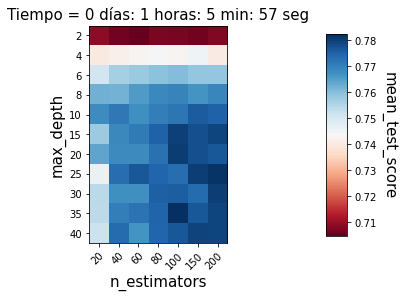

In [49]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False, cmap='GnBu'):
    results=cv_results
    scores_matrix = pd.pivot_table(data=cv_results.sort_values('mean_test_score', ascending=True),
                                   index='param_modelRandomForest__max_depth', 
                                   #columns='param_prepsimpleimputer__transimpleimputer__simpleimputer__strategy',
                                   #columns='param_prepminmax__tranminmax__minmax__feature_range', 
                                   columns='param_modelRandomForest__n_estimators', 
                                   values='mean_test_score')
    im = ax.imshow(scores_matrix, cmap=cmap)
    z=results['mean_test_score']
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()   
    #ax.set_xticks(np.arange(len(feature_range)))
    #ax.set_xticklabels([x for x in feature_range])
    #ax.set_xlabel('feature_range', fontsize=15)   
    ax.set_xticks(np.arange(len(n_estimators)))
    ax.set_xticklabels([x for x in n_estimators])
    ax.set_xlabel('n_estimators', fontsize=15)    
    ax.set_yticks(np.arange(len(max_depth)))
    ax.set_yticklabels(['{0:0.00f}'.format(x) for x in max_depth])
    ax.set_ylabel('max_depth', fontsize=15)
    # Para girar las etiquetas de las marcas y establecer su alineación
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")  
    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                           fontsize=15)

fig, axes = plt.subplots(ncols=1, sharey=True)
ax2 = axes

make_heatmap(ax2, gs, make_cbar=True, cmap='RdBu')
#Otros valores de colormaps: 'GnBu', 'RdBu', 'viridis', 'cividis'

from datetime import datetime, timedelta

def GetTime(sec):
    d = datetime(1,1,1) + sec
    tiempoTotal=("%d días: %d horas: %d min: %d seg" % (d.day-1, d.hour, d.minute, d.second))
    return tiempoTotal

sec=timedelta(seconds=gs_time)
tiempoTotal=GetTime(sec)
print(tiempoTotal)
ax2.set_title('Tiempo = '+tiempoTotal, fontsize=15)
plt.show()

<div id="CreacionModeloOptimizado" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Creación de Modelo Optimizado</h2> </div>

In [50]:
#Se elimina el modelo Random Forest base
pipe.steps.pop()
#Se agrega el clasificador Random Forest optimizado al final
pipe.steps.append(['modelRandomForest',RandomForestClassifier(n_estimators=200, max_depth=25, random_state=0)])

print("Cantidad de pasos: ",len(pipe.steps))
#print(pipe.steps)

X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size = 0.2, random_state = 0)

modeloEntrenado = pipe.fit(X_train, y_train)
print('Entrenamiento listo')

Cantidad de pasos:  3
Entrenamiento listo


<div id="PrediccionNuevoElemento" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 4: Predicción de un Nuevo Cliente con Modelo Optimizado</h2> </div>

La siguiente función permite predecir si se aprueba o no un crédito a un nuevo cliente. En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y los nombres de las variables. El método "predict" ejecuta el Pipeline: los pasos de transformación y la clasificación (mediante Random Forest). Así se predice si el cliente es bueno (1) o malo (0). La función puede ser llamada desde una interfaz web, móvil, etc. En otra práctica veremos cómo desarrollar un microservicio con Machine Learning, de tal manera que el método pueda ser consumido desde un Sistema Informático Empresarial. 

Para realizar las predicciones en un sistema aislado de la lógica de experimentos, se debe cargar el Pipeline que incluya el preprocesamiento y el modelo Random Forest. Con ello, se podría realizar las predicciones para nuevos clientes.

In [51]:
def predecirNuevoCliente(ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                            MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                            VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                            TRABAJADOREXTRANJERO='A201'):    
    cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
            'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
            'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
            'TRABAJADOREXTRANJERO']
    Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
          TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
          CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    
    #dataTransformado=pipe.transform(Xnew_Dataframe)#30 variables
    #dataReducido=pca.transform(dataTransformado)#3 variables
    #pred = modeloKNN.predict(dataReducido)
    
    pred = (pipe.predict(Xnew_Dataframe) > 0.5).astype("int32")
    pred = pred.flatten()[0]# de 2D a 1D
    return pred

**Predicciones para Nuevos Clientes:**

El **Cliente1** tiene un valor menor a 0 en la cuenta corriente (A11), tiene 4 personas a mantener, tiene 30 años.

In [52]:
ESTADOCUENTACORRIENTE='A11'
PLAZOMESESCREDITO=36
HISTORIALCREDITO='A32'
PROPOSITOCREDITO='A42'
MONTOCREDITO=3959
SALDOCUENTAAHORROS='A61'
TIEMPOACTUALEMPLEO='A71'
TASAPAGO=4
ESTADOCIVILYSEXO='A93'
GARANTE='A101'
TIEMPORESIDENCIAACTUAL=3 
ACTIVOS='A122'
EDAD=30
VIVIENDA='A152'
CANTIDADCREDITOSEXISTENTES=4
EMPLEO='A174'
CANTIDADPERSONASAMANTENER=1
TRABAJADOREXTRANJERO='A201'

prediccion=predecirNuevoCliente(ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,
                                          MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,
                                          TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,
                                          CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO)
print('Cliente1:')
if prediccion==1:
    print('Crédito Aprobado')
else:
    print('Crédito No Aprobado')

Cliente1:
Crédito No Aprobado


El **Cliente2** pide monto bajo, tiene 2 personas a mantener, tiene 67 años (valores por defecto de la función 'predecirNuevoCliente')

In [53]:
prediccion=predecirNuevoCliente()
print('Cliente2:')
if prediccion==1:
    print('Crédito Aprobado')
else:
    print('Crédito No Aprobado')

Cliente2:
Crédito Aprobado


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

Hemos creado un clasificador mediante un Random Forest, hemos realizado el tuning de los hiperparámetros. Sin la optimización el accuracy con Train_Test_Split (un solo Fold) es 0.72 y mediante cross_val_score con 5 Folds el accuracy es 0.734. Con la optimización y ajuste de parámetros el resultado es 0.786 (cantidad de árboles=200, profundidad=25). Esto demuestra la importancia de la fase de optimización y tuning de parámetros de los modelos de machine learning. Este proceso lo hemos automatizado mediante un Pipeline y GridSearchCV. Hay otras librerías de optimización propias para cada modelo, las cuales veremos en otras prácticas.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] El Naqa, I., & Murphy, M. J. (2015). What is machine learning?. In machine learning in radiation oncology (pp. 3-11). Springer, Cham.

[3] Duda, R. O., Hart, P. E., & Stork, D. G. (2012). Pattern classification. John Wiley & Sons.

[4] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[5] Brownlee. J. (2019, Agosto 12). A Tour of Machine Learning Algorithms [Machine Learning Mastery]. Recuperado de https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

[6] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[7] Müller, A. (2020). More on Pipelines. [Applied Machine Learning with Python]. Recuperado de https://amueller.github.io/aml/01-ml-workflow/12-pipelines-gridsearch.html

[8] Martinez, J. (2020). Precision, Recall, F1, Accuracy en clasificación [IArtificial.net]. Recuperado de https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

**Enlaces de documentación de scikit-learn y matplotlib:**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://stats.stackexchange.com/questions/405624/difference-between-cross-validation-gridsearchcv-and-does-cross-validation-refer

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

https://matplotlib.org/stable/tutorials/colors/colormaps.html